# 인공 신경망

In [ ]:
# !pip install tensorflow

In [1]:
from tensorflow import keras

## 패션 MNIST
- mnist 데이터는 훈련데이터와 테스트 데이터를 튜플 형식으로 나누어서 반환함
    - load할때 변수별로 나눠 받아주는 것이 편하다

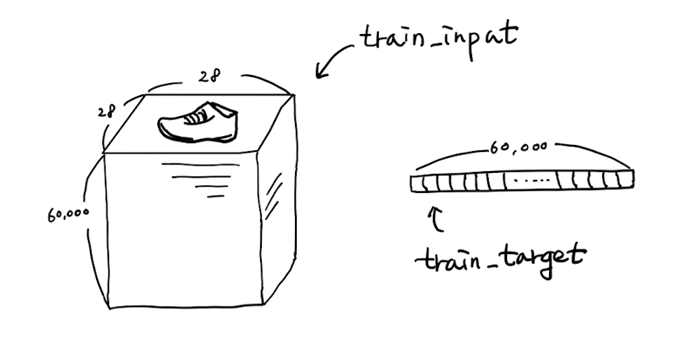

In [2]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
# 28*28 픽셀 이미지, 흑백
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


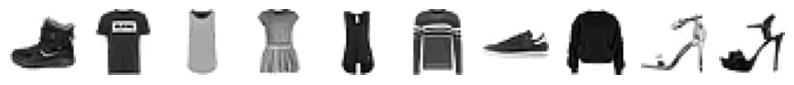

In [6]:
import matplotlib.pyplot as plt
# 이미지 확인
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [7]:
train_input[i]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [9]:
# target의 카테고리별 갯수 및 수치 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


#### 패션 mnist 타겟 값
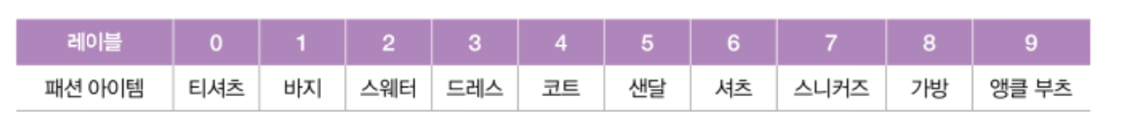

## 로지스틱 회귀로 패션 아이템 분류하기

In [10]:
# 이미지 데이터의 수치 범위가 0~255임, 255로 나누어서 숫자범위를 줄인다
train_scaled = train_input/255.0
# 2차원 이미지를 1차원 벡터로 변환
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
# max_iter=5
# loss='log'
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
# 정확도는 81.9%

0.8192833333333333


### 로지스틱 회귀 식
- 회귀 알고리즘이므로 회귀계수를 구해 각 결정값을 만들어낸다
- z_티셔츠 = w1 * 픽셀1 + w2 * 픽셀2 + ..... + w784 * 픽셀784 + b
    - 10개의 분류이므로 10개의 방정식이 생성되고 10개 방정식에 대해 모든 데이터를 적용하여 각 결정값의 확률을 찾아냄
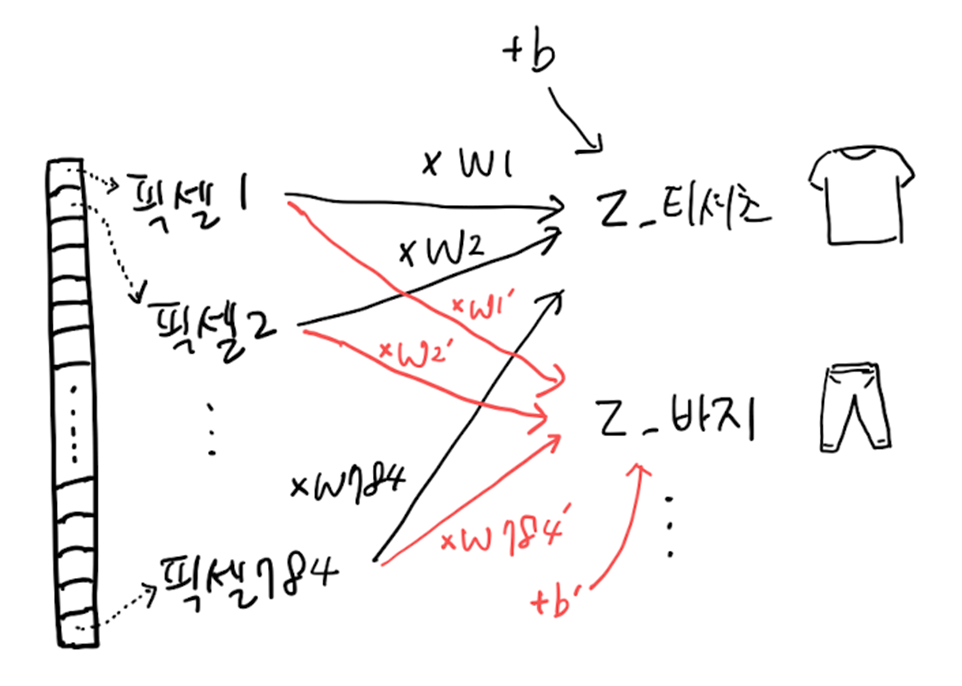    

## 인공신경망
- 확률적 경사하강법을 사용하는 로지스틱 회귀와 같다
- z값(결정값)을 계산하는 단위를 뉴런이라고 함(요즘은 유닛이라고 부름)
    - 이 값을 바탕으로 클래스를 예측하기때문에 출력층 이라고도 부름
- 각 픽셀을 입력층이라고 부름
    - 입력층은 픽셀 자체이고 특별한 계산을 수행하지는 않는다
- 출력층 Zi를 만들기 위해서 픽셀 1(X1)에 곱해지는 가중치는 W1.1, 픽셀 2(X2)에 곱해지는 가증치는 W1.2 라고 표기한다
- 절편은 뉴런마다 하나씩임

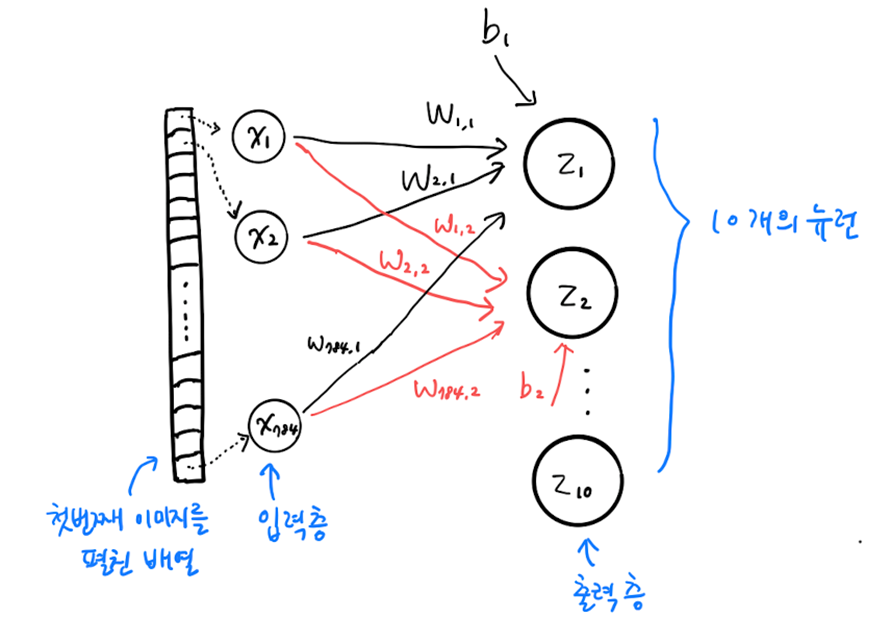

- 인공 뉴런을 그림으로 표현하면 모양이 생물학적 뉴런과 비슷하여 부르는 이름이지 생물학적 뉴런의 기능과 아무 상관 없음
    - 새로운 종류의 머신러닝 알고리즘일 뿐임
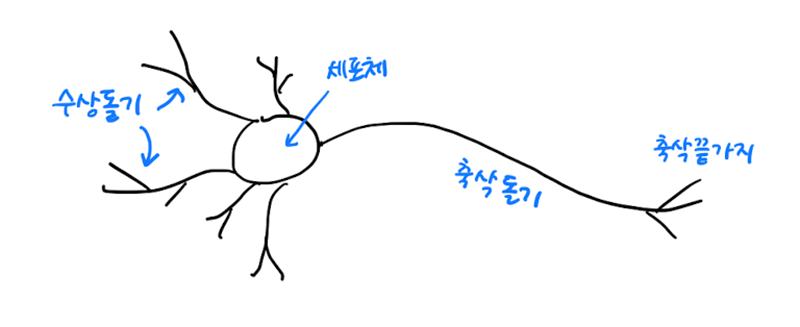
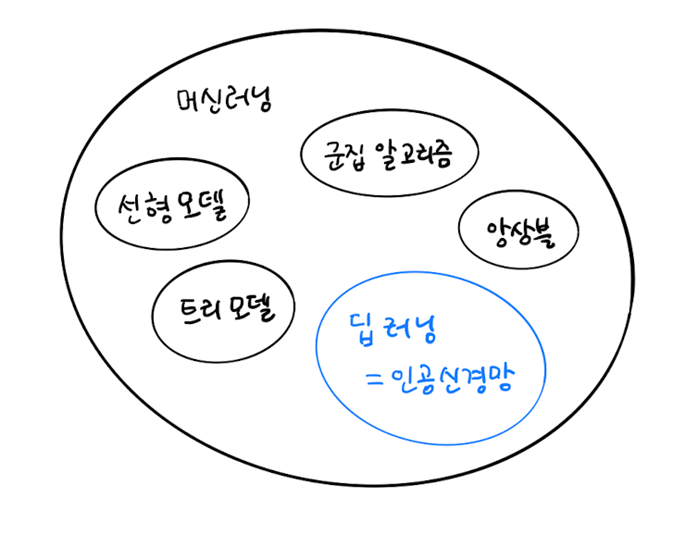

### 텐서플로와 케라스
- 인공신경망은 로지스틱회귀와 비슷하지만 로지스틱회귀가 제공하지 않는 몇가지 기능을 더 갖고 있음
- 케라스는 텐서플로의 고수준 API임
    - 딥러닝 라이브러리는 GPU 사용이 가능
    - 케라스는 GPU 연산을 수행하는 백엔드 라이브러리를 사용함(텐서플로)

In [12]:
import tensorflow as tf

In [13]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

- 머신 러닝은 교차검증을 사용해 모델을 평가했지만 딥러닝은 검증 데이터를 따로 덜어내어 사용함
    - 딥러닝의 데이터는 충분히 크기때문에 검증 검수가 안정적임
    - 교차 검증을 수행하기에는 시간이 너무 오래 걸림

In [14]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target =train_test_split(train_scaled,
                                                                     train_target,
                                                                     test_size=0.2,
                                                                     random_state=42)

In [15]:
train_scaled.shape

(48000, 784)

- 인공신경망 오른쪽을을 생성(첫번째 층)
    - 10개의 패션 아이템을 구별하기 위해 10개의 뉴런(unit)으로 구성
    - softmax 함수를 통해 각 아이템의 비율을 계산
    - 총 몇개의 입력이 들어오는지 정보를 넣어줘야 함
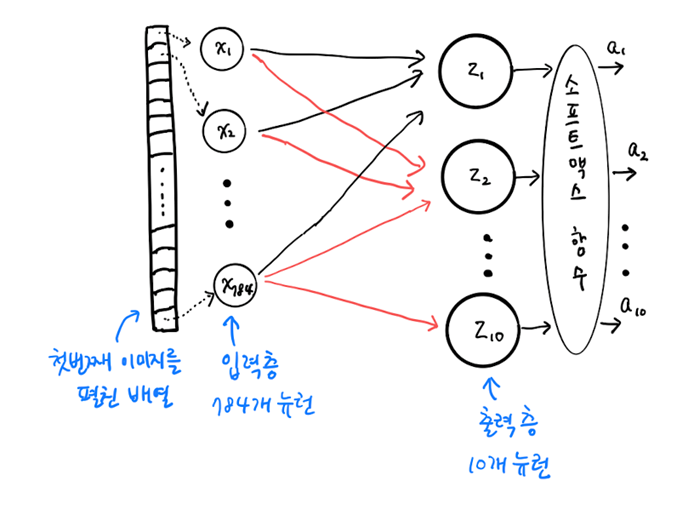

- 밀집층
    - 케라스에는 다양한 층이 준비되어 있음
    - 밀집층은 784 * 10으로 연결되어 빽빽한 연결선이 있어 밀집층이라고 함
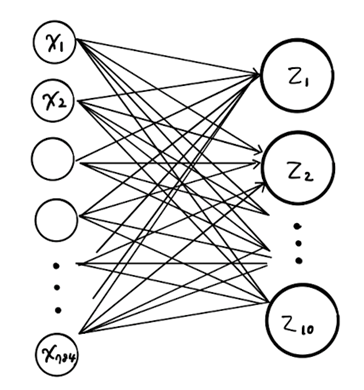
- 가중치와 절편은 그림 가독성을 위해 표시되지 않았음
    - 절편은 뉴런마다 더해짐

In [16]:
# 밀집층 생성을 위한 기본 모델 모양을 구성
# Dense 클래스 사용 - Dense 클래스 사용 인스턴스 생성
# 뉴런개수, 뉴런 출력에 사용할 활성화함수, 입력크기를 파라미터로 사용함
# 10개의 출력값을 확률값으로 바꾸기위해 softmax(다중분류), sigmoid (이진분류)
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [17]:
# 모델에서 사용할 층을 결합시키는 과정을 진행
# 밀집층 생성
# Sequential 클래스 이용 : 
# 층의 구성정보를 담고있는 dense 클래스 객체를 파라미터로 전달
model = keras.Sequential(dense)
# model객체 변수가 신경망 모델임

- 위 코드로 인해 신경망 모델이 만들어짐
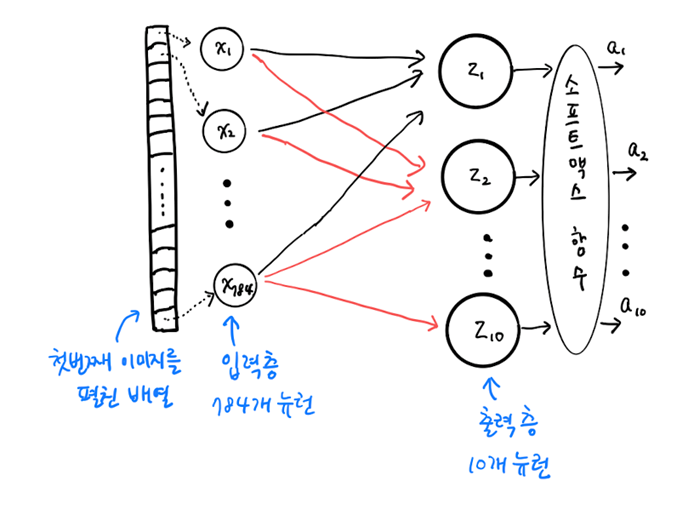

## 인공신경망으로 패션 아이템 분류하기
- 훈련전에 설정 단계가 있음
    - MODEL.compile(loss=손실함수,metrics=평가방법)
    - 손실함수란? 어떤 문제에 대해 머신러닝(딥러닝)이 얼마나 잘못되고 있는지를 측정하는 기준
        - 값이 작을수록 좋지만 최솟값인지는 알지 못함
        - 가능한 많이 찾아보고 만족할만한 수준이라면 최솟값이라고 인정하고 종료해야 함
        - 대부분 문제에서 다루는 손실함수들은 이미 정의되어 있는 경우가 많음
        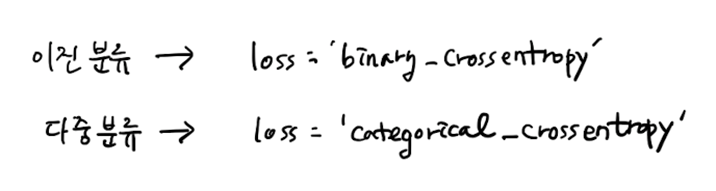
    - 손실함수는 정답(타깃)과 예측을 입력으로 받아서 실수값 점수를 만드는데, 점수가 높을 수록 모델이 안좋음

**티셔츠 샘플에 대하여**
- 이진분류 형태처럼 계산(크로스엔트로피)
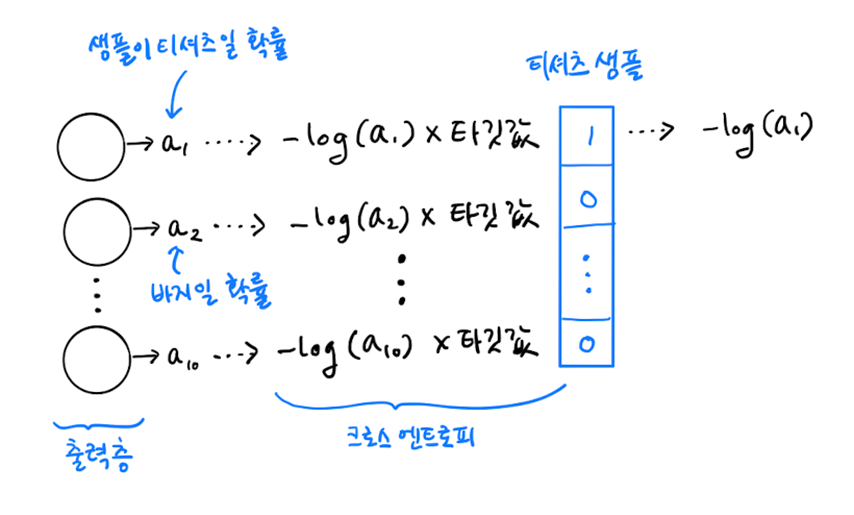
- 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력
    - 첫번째 출력 : 티셔츠일 확률, 두번째 출력 : 바지일 확률 ...
    - 타깃에 해당하는 확률만 남겨놓기 위해서는 나머지 확률에는 모두 0을 곱해줘야 함
    - 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫번째 뉴런의 활성화 출력 a1이 값을 가능한 1에 가깝게 만들어야 함

In [18]:
# 샘플이 티셔츠일 경우
# 티셔츠일 확률이 0.6이라면
# 손실점수는 -log(0.6) * 1이 됨
# 바지일 확률이 0.02이라면
# 손질점수는 -log(0.6) * 0
-np.log(0.6) * 1
# 손실점수(0.5)

0.5108256237659907

In [19]:
# 다음층에서 다시 계산했을때
# 샘플이 티셔츠일 확률이 0.7로 나왔다면
# 손실점수는 0.3이됨
-np.log(0.7) * 1

0.35667494393873245

**원-핫 인코딩 형태**
- 크로스 엔트로피를 다중분류에서 쓰려면 원-핫 인코딩형태로 변형해야 함
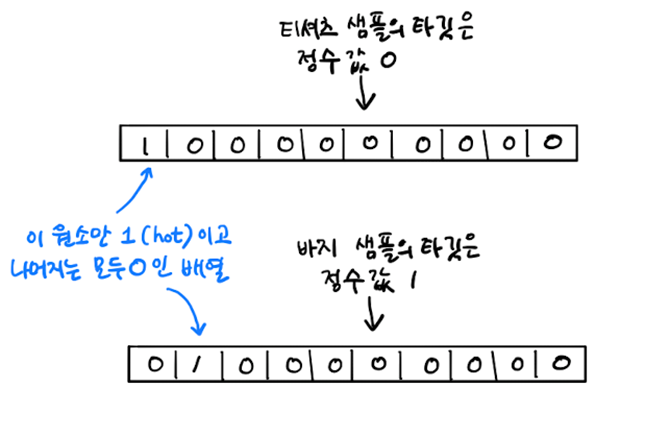

- mnist의 타겟값은 0~9 까지의 정수
    - 정수 타깃값을 원-핫 인코딩방법으로 바꾸지 않고 그냥 사용할 수 있는 방법이 sparse_categorical_crossentropy 임

In [21]:
# 다중 분류 손실함수는 sparse_categorical_crossentropy를 사용
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
# 학습
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4246 - accuracy: 0.8559
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4189 - accuracy: 0.8596
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4163 - accuracy: 0.8589
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4139 - accuracy: 0.8617
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4106 - accuracy: 0.8621
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4077 - accuracy: 0.8632
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8644
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4044 - accuracy: 0.8644
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4031 - accuracy: 0.8646
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.401

**tip. 텐서플로와 같은 딥러닝 라이브러리는 인공신경망을 만들고 훈련할 때 랜덤하게 동작하는 특성이 있어 결과가 다 다를 수 있음**
- 모델이 최적점에 안전하게 수렴한다면 일반적으로 이 차이는 크지 않다

In [24]:
# 검증세트로 모델의 성능 확인(성능평가 : evaluate())
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4385 - accuracy: 0.8511


[0.438486784696579, 0.8510833382606506]